In [22]:
# Import libraries
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Data preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [24]:
# Model defination
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) 
        self.fc2 = nn.Linear(128, 10)   

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))           
        x = self.fc2(x)                 
        return x

model = Net()

In [25]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()                 
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [26]:
# Model training
epochs = 5
loss_history = []
epoch_loss = []
print("Training started...")
for epoch in range(epochs):
    running_loss = 0.0

    for batch_idx, (inputs, targets) in enumerate(train_loader):

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        loss_history.append(loss.item())

    avg_loss = running_loss / len(train_loader)
    epoch_loss.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}] Average Loss: {avg_loss:.4f}")
            

print("Training finished...")

Training started...
Epoch [1/5] Average Loss: 0.2723
Epoch [2/5] Average Loss: 0.1178
Epoch [3/5] Average Loss: 0.0804
Epoch [4/5] Average Loss: 0.0617
Epoch [5/5] Average Loss: 0.0482
Training finished...


In [27]:
# Testing started
model.eval()  

correct = 0
total = 0

with torch.no_grad(): 
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Testing set accuracy: {accuracy:.2f}%")

Testing set accuracy: 97.61%


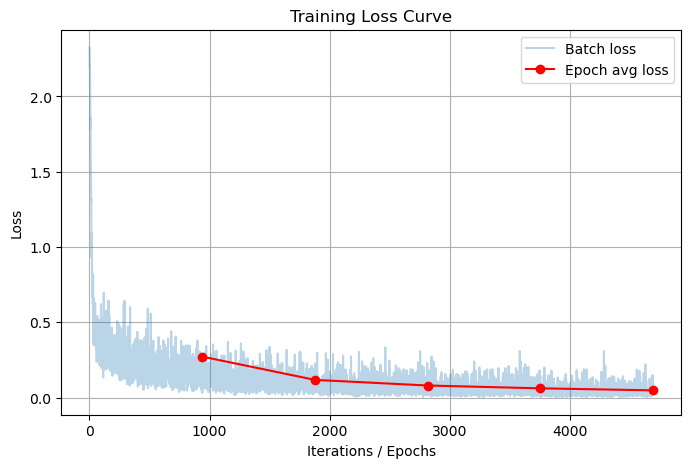

In [29]:
# Outcome visualization

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    output = model(example_data)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(loss_history) + 1), loss_history, alpha=0.3, label='Batch loss')
batches_per_epoch = len(loss_history) // epochs
epoch_x = [batches_per_epoch * (i+1) for i in range(epochs)]

plt.plot(epoch_x, epoch_loss, marker='o', color='red', label='Epoch avg loss')
plt.legend()
plt.xlabel('Iterations / Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()
